# Image Handling: Assignment

Using the image from the the beginning of this lesson, "rat_cerebellum.jpg", do the following tasks:

- Import the image and display it.
- Show histograms of each of the colour channels and plot the contributions of each of the RGB colours separately.
- Create three different binary masks using manually determined thresholds: one for mostly red pixels, one for mostly green pixels, and one for mostly blue pixels. Note that you can apply conditions that are either greater than or smaller than a threshold of your choice.
- Plot the three masks and the corresponding masked images.
- Using your masks, approximate the relative amounts of synaptophysin, IP3R, and DNA in the image. To do this, you can assume that the number of red pixels represents synaptophysin, green pixels represents IP3R and blue pixels represent DNA. The results will vary depending on the setting of the thresholds. How do different theshold values change your results?
- Change the resolution of your image to different values. How does the resolution affect your results?


In [24]:
from matplotlib.image import imread
from matplotlib.pyplot import subplots

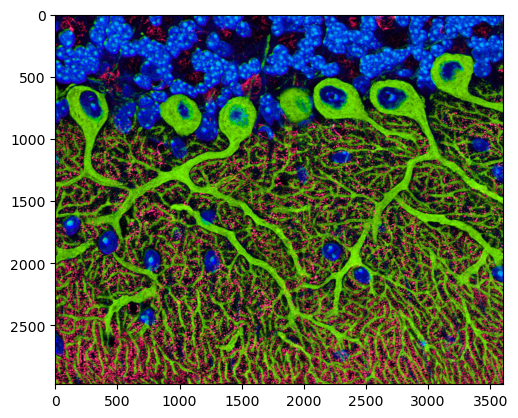

In [25]:
#1
image = imread('data/rat_cerebellum.jpeg')
fig, ax = subplots()
ax.imshow(image)

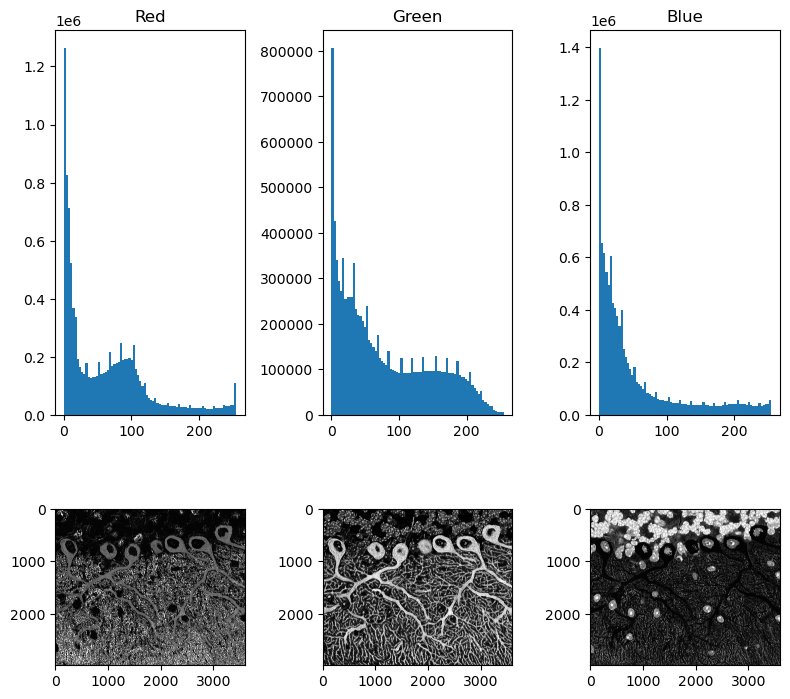

In [26]:
#2
image_R = image[:, :, 0]
image_G = image[:, :, 1]
image_B = image[:, :, 2]

fig, ax = subplots(nrows = 2, ncols = 3, figsize = (8, 8))
ax[0][0].hist(image_R.ravel(), bins = 80);
ax[0][0].set_title('Red');
ax[0][1].hist(image_G.ravel(), bins = 80);
ax[0][1].set_title('Green');
ax[0][2].hist(image_B.ravel(), bins = 80);
ax[0][2].set_title('Blue');

ax[1][0].imshow(image_R, cmap = 'gray');
ax[1][1].imshow(image_G, cmap = 'gray');
ax[1][2].imshow(image_B, cmap = 'gray');

fig.tight_layout()

In [29]:
#3
threshold_R = 125
threshold_G = 100
threshold_B = 100

mask_R = image_R > threshold_R
mask_G = image_G > threshold_G
mask_B = image_B > threshold_B

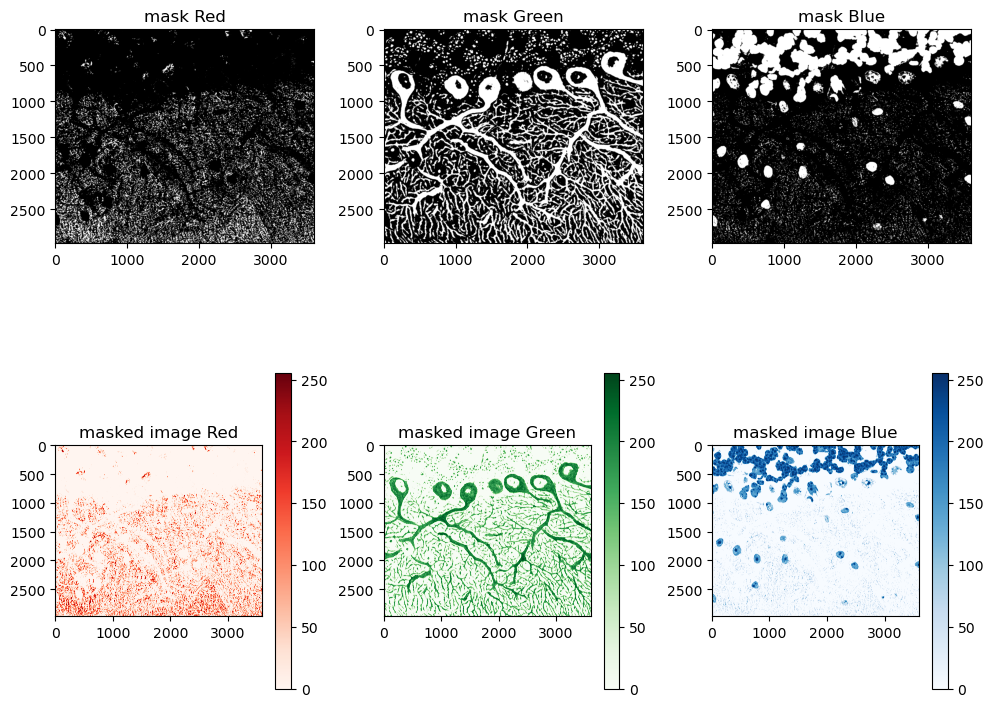

In [52]:
#4
maskedima_R = image_R * mask_R
maskedima_G = image_G * mask_G
maskedima_B = image_B * mask_B

fig, ax = subplots(nrows = 2, ncols = 3, figsize = (10, 20))
ax[0][0].imshow(mask_R, cmap = 'gray');
ax[0][0].set_title('mask Red')
ax[0][1].imshow(mask_G, cmap = 'gray');
ax[0][1].set_title('mask Green')
ax[0][2].imshow(mask_B, cmap = 'gray');
ax[0][2].set_title('mask Blue')

masked_R = ax[1][0].imshow(maskedima_R, cmap = 'Reds');
ax[1][0].set_title('masked image Red');
fig.colorbar(masked_R, ax = ax[1][0], orientation = 'vertical', shrink = 0.2);

masked_G = ax[1][1].imshow(maskedima_G, cmap = 'Greens');
ax[1][1].set_title('masked image Green');
fig.colorbar(masked_G, ax = ax[1][1], orientation = 'vertical', shrink = 0.2);

masked_B = ax[1][2].imshow(maskedima_B, cmap = 'Blues');
ax[1][2].set_title('masked image Blue');
fig.colorbar(masked_B, ax = ax[1][2], orientation = 'vertical', shrink = 0.2);

fig.tight_layout(h_pad = -50)


In [80]:
#5
from numpy import sum

pixels_total = image.shape[0]*image.shape[1];
pixels_R = sum(mask_R);
pixels_G = sum(mask_G);
pixels_B = sum(mask_B);

print('synaptophysin accuonts for ', round(pixels_R/pixels_total*100, 3), '%');
print('IP3R accounts for ', round(pixels_G/pixels_total*100, 3), '%');
print('DNA accounts for ', round(pixels_B/pixels_total*100, 3), '%');

print('The larger the threshold that I set for each mask, the smaller value of portion I will get for each molecule')

synaptophysin accuonts for  12.578 %
IP3R accounts for  34.574 %
DNA accounts for  19.01 %
The larger the threshold that I set for each mask, the smaller value of portion I will get for each molecule


In [81]:
#6
print('Change in image resolution would change both total image pixels and corresponding masked-image pixels, so I would expect the results for the portions of each molecule would not change')

Change in image resolution would change both total image pixels and corresponding masked-image pixels, so I would expect the results for the portions of each molecule would not change
